In [1]:
from urbansim_templates import modelmanager as mm
from urbansim_templates.models import LargeMultinomialLogitStep
import orca
import os; os.chdir('../')
import warnings; warnings.simplefilter('ignore')
%load_ext memory_profiler

In [2]:
from scripts import datasources, models, variables

Registering model step 'auto_ownership'
Registering model step 'TOD_choice'
Registering model step 'primary_mode_choice'
Registering model step 'WLCM'


### Automated loading

In [3]:
orca.run(['initialize_network_walk','initialize_network_beam'])

Running step 'initialize_network_walk'
Time to execute step 'initialize_network_walk': 0.00 s
Running step 'initialize_network_beam'
Time to execute step 'initialize_network_beam': 0.00 s
Total time to execute iteration 1 with iteration value None: 0.00 s


### Test manual loading of the network

In [4]:
import pandas as pd
import pandana as pdna

In [5]:
nodesbeam = pd.read_csv(
    '/home/data/spring_2019/beam_to_urbansim/beam_nodes_sorted.csv'
).set_index('id')
edgesbeam = pd.read_csv(
    '/home/data/spring_2019/beam_to_urbansim/beam_links_8am_sorted.csv'
).set_index('link')

In [6]:
%%time
%memit netbeam = pdna.Network(nodesbeam['lon'], nodesbeam['lat'], edgesbeam['from'], edgesbeam['to'], edgesbeam[['traveltime']], twoway=False)

peak memory: 880.61 MiB, increment: 532.74 MiB
CPU times: user 1min 1s, sys: 2.3 s, total: 1min 4s
Wall time: 6.01 s


In [7]:
jobs = orca.merge_tables('jobs', ['jobs','buildings','parcels'])

#### No pre-compute

In [8]:
%%time
%memit job_nodes = netbeam.get_node_ids(jobs['x'], jobs['y'])

peak memory: 10098.93 MiB, increment: 0.00 MiB
CPU times: user 4.6 s, sys: 258 ms, total: 4.86 s
Wall time: 5.09 s


#### With pre-compute

In [11]:
%%time
%memit netbeam.precompute(1000)

peak memory: 94907.04 MiB, increment: 84808.61 MiB
CPU times: user 47min 33s, sys: 59 s, total: 48min 32s
Wall time: 3min 10s


In [16]:
%%time
%memit job_nodes = netbeam.get_node_ids(jobs['x'], jobs['y'])

OSError: [Errno 12] Cannot allocate memory

### How far can we pre-compute before the kernel crashes?

Precompute 0

In [4]:
%memit orca.run(['network_aggregations_beam'])

Running step 'network_aggregations_beam'
Computing accessibility variables
Computing jobs_30_minutes
Computing jobs_15_minutes
       jobs_30_minutes  jobs_15_minutes
count     4.310070e+05    431007.000000
mean      5.410787e+05    186114.945477
std       5.057929e+05    218258.276304
min       0.000000e+00         0.000000
25%       5.429000e+03       493.000000
50%       5.747980e+05     61335.000000
75%       9.921740e+05    377706.000000
max       1.689665e+06    685535.000000
Time to execute step 'network_aggregations_beam': 1683.60 s
Total time to execute iteration 1 with iteration value None: 1683.61 s
peak memory: 1912.76 MiB, increment: 1630.81 MiB


Precompute 500

In [4]:
%memit orca.run(['network_aggregations_beam'])

Running step 'network_aggregations_beam'
Computing accessibility variables
Computing jobs_30_minutes
       jobs_30_minutes
count     4.310070e+05
mean      5.410787e+05
std       5.057929e+05
min       0.000000e+00
25%       5.429000e+03
50%       5.747980e+05
75%       9.921740e+05
max       1.689665e+06
Time to execute step 'network_aggregations_beam': 1298.57 s
Total time to execute iteration 1 with iteration value None: 1298.57 s
peak memory: 26795.20 MiB, increment: 26512.47 MiB


Precompute 1000

In [4]:
%memit orca.run(['network_aggregations_beam'])

Running step 'network_aggregations_beam'
Computing accessibility variables
Computing jobs_30_minutes
Computing jobs_15_minutes
       jobs_30_minutes  jobs_15_minutes
count     4.310070e+05    431007.000000
mean      5.410787e+05    186114.945477
std       5.057929e+05    218258.276304
min       0.000000e+00         0.000000
25%       5.429000e+03       493.000000
50%       5.747980e+05     61335.000000
75%       9.921740e+05    377706.000000
max       1.689665e+06    685535.000000
Time to execute step 'network_aggregations_beam': 1739.80 s
Total time to execute iteration 1 with iteration value None: 1739.81 s
peak memory: 92963.98 MiB, increment: 92680.61 MiB


Precompute 1000, sorted tables

In [4]:
%memit orca.run(['network_aggregations_beam'])

Running step 'network_aggregations_beam'
Computing accessibility variables
Computing jobs_30_minutes
Computing jobs_15_minutes
       jobs_30_minutes  jobs_15_minutes
count     4.310070e+05    431007.000000
mean      5.410787e+05    186114.945477
std       5.057929e+05    218258.276304
min       0.000000e+00         0.000000
25%       5.429000e+03       493.000000
50%       5.747980e+05     61335.000000
75%       9.921740e+05    377706.000000
max       1.689665e+06    685535.000000
Time to execute step 'network_aggregations_beam': 1710.06 s
Total time to execute iteration 1 with iteration value None: 1710.06 s
peak memory: 91858.21 MiB, increment: 91576.37 MiB


Precompute 1500 -- kernel dies here

In [ ]:
%memit orca.run(['network_aggregations_beam'])

Running step 'network_aggregations_beam'


### Query the nodesbeam table

In [8]:
nodesbeam = orca.get_table('nodesbeam').to_frame()

In [9]:
nodesbeam.head()

,jobs_30_minutes,jobs_15_minutes
id,,
0,997029.0,601539.0
1,994588.0,597482.0
10,1225736.0,454009.0
100,987822.0,508218.0
1000,1588853.0,267776.0


### Plot jobs

In [6]:
netbeam = orca.get_injectable('netbeam')

#### Jobs within 30 minutes

(<mpl_toolkits.basemap.Basemap at 0x7fa3483d3320>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa37002ee80>)

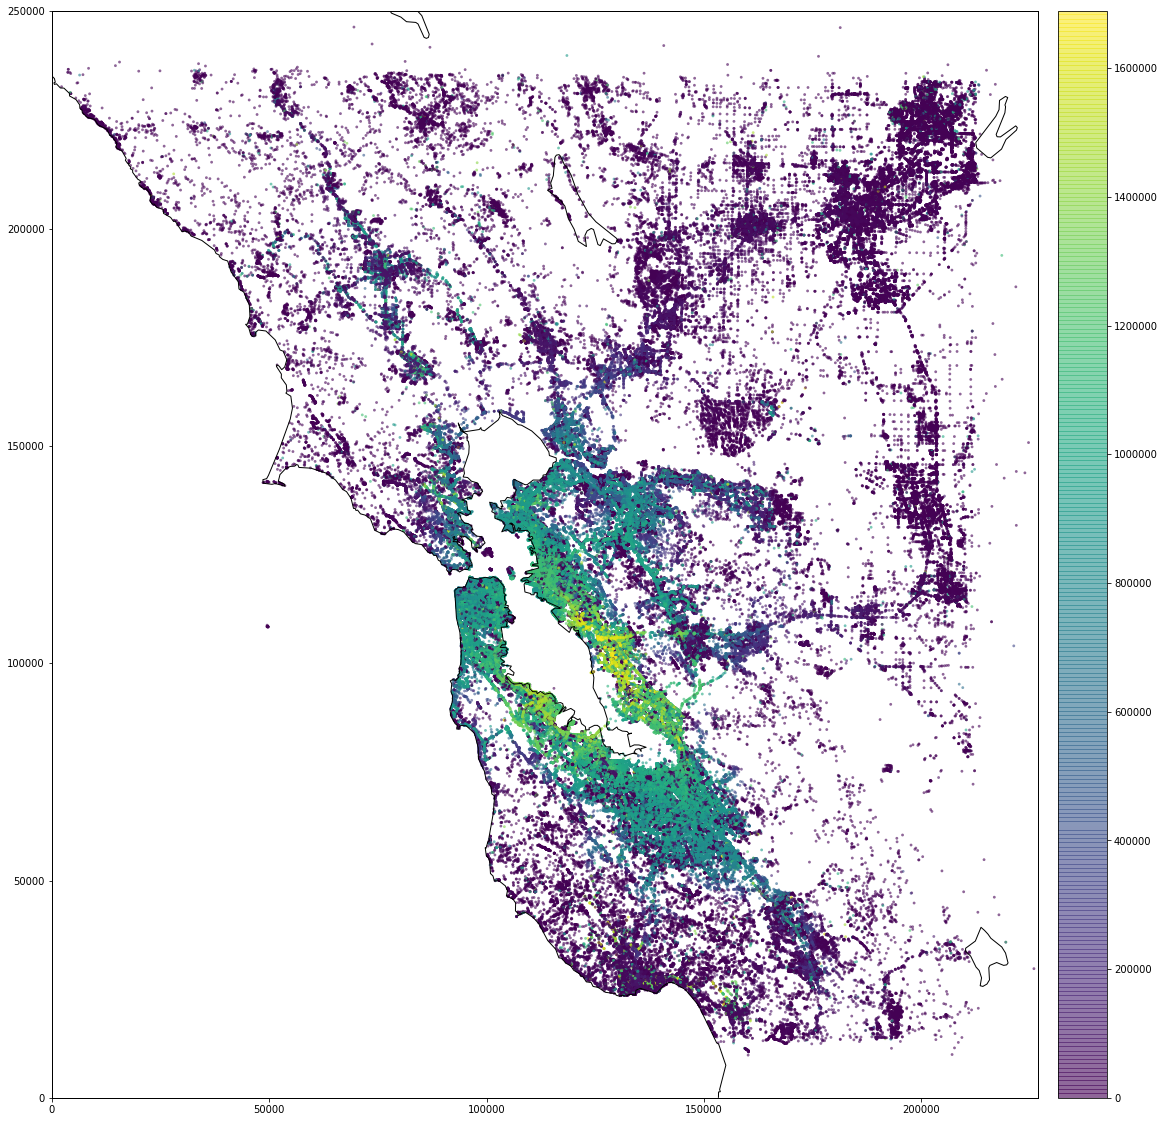

In [15]:
sf_bbox = [36.707794, -123.524338, 39, -121]

netbeam.plot(nodesbeam['jobs_30_minutes'], bbox=sf_bbox,
         fig_kwargs={'figsize': [20, 20]},
         bmap_kwargs={'suppress_ticks': False,
                      'resolution': 'h', 'epsg': '26943'},
         plot_kwargs={'cmap': 'viridis', 's': 8, 'edgecolor': 'none', 'alpha':0.6})

#### Jobs within 15 minutes

(<mpl_toolkits.basemap.Basemap at 0x7f576f31e898>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f576f35d2b0>)

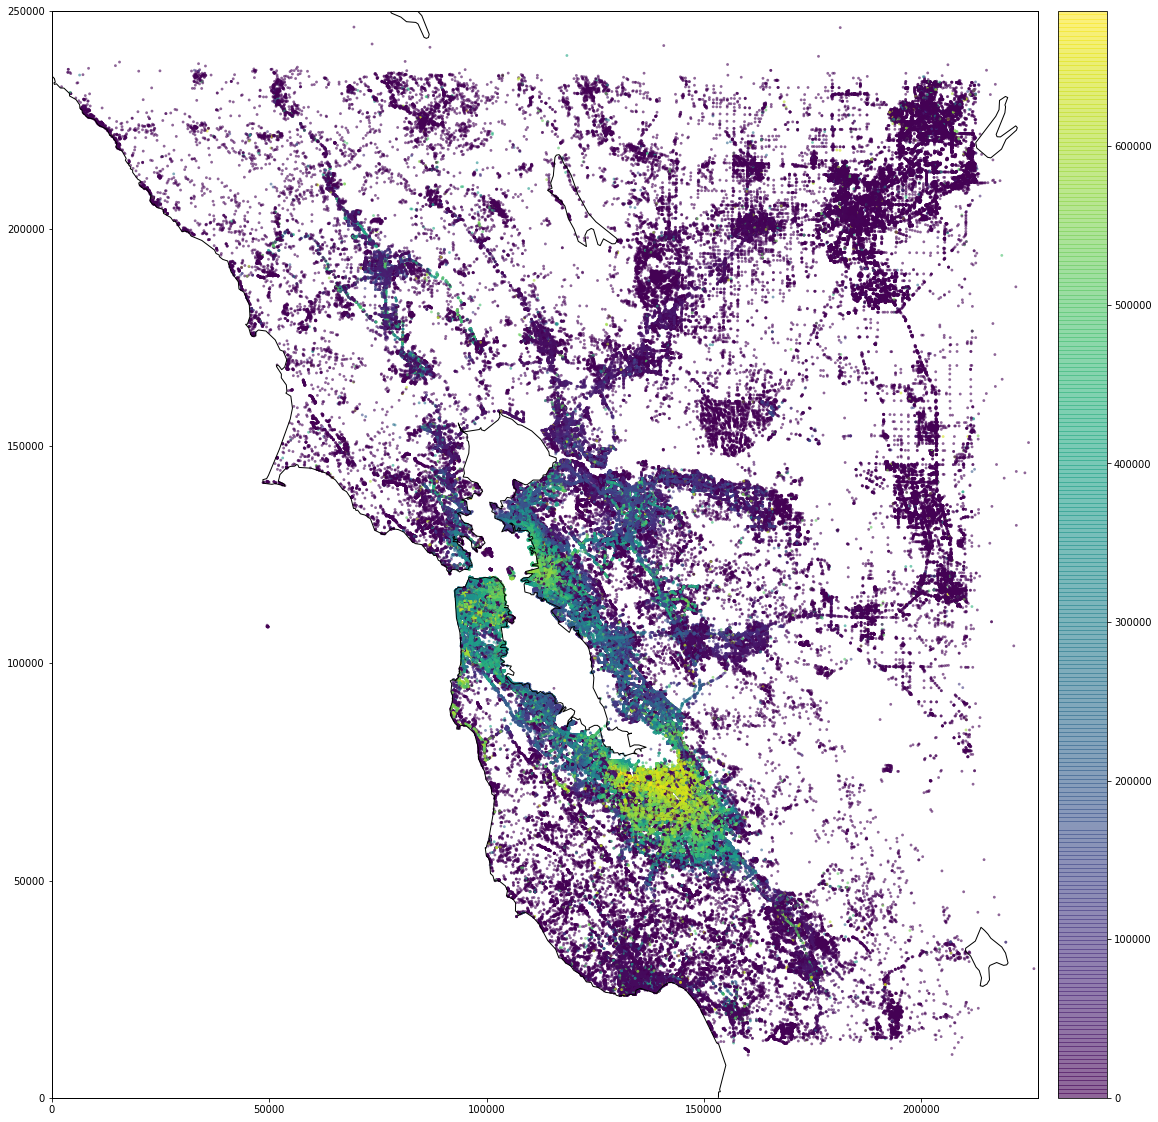

In [10]:
sf_bbox = [36.707794, -123.524338, 39, -121]

netbeam.plot(nodesbeam['jobs_15_minutes'], bbox=sf_bbox,
         fig_kwargs={'figsize': [20, 20]},
         bmap_kwargs={'suppress_ticks': False,
                      'resolution': 'h', 'epsg': '26943'},
         plot_kwargs={'cmap': 'viridis', 's': 8, 'edgecolor': 'none', 'alpha':0.6})